### **Ridge Regression – House Price Prediction**

Ridge Regression is used to **reduce overfitting** by adding a penalty term to the Linear Regression cost function. This helps **improve generalization on unseen data**.

### **DATASET LOADING**

The **dataset used** for Ridge Regression is the **same housing dataset used in previous models**. Reusing the same data ensures a fair comparison between different regression algorithms.

In [1]:
import pandas as pd

# Load training and testing datasets
train_df = pd.read_csv("/content/california_housing_train.csv")
test_df = pd.read_csv("/content/california_housing_test.csv")

# Preview data
train_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,RoomsPerHousehold,MedHouseVal
0,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.359130,1.030
1,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,2.573820,3.821
2,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,2.073224,1.726
3,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,1.002116,0.934
4,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,2.725400,0.965


### **FEATURE & TARGET SEPARATION**

Features contain house-related information, while the target variable represents the house price to be predicted.

In [2]:
# Separate features and target (training data)
X_train = train_df.drop("MedHouseVal", axis=1)
y_train = train_df["MedHouseVal"]

# Separate features and target (testing data)
X_test = test_df.drop("MedHouseVal", axis=1)
y_test = test_df["MedHouseVal"]

# Check shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((16512, 9), (16512,), (4128, 9), (4128,))

### **FEATURE SCALING**

Feature scaling **ensures all features contribute equally to the Ridge Regression model.**

In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data & transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)


### **TRAIN THE RIDGE MODEL**

Ridge Regression **adds L2 regularization to control model complexity** and improve generalization.

In [4]:
from sklearn.linear_model import Ridge

# Initialize Ridge model
ridge_model = Ridge(alpha=1.0)

# Train model
ridge_model.fit(X_train_scaled, y_train)


Ridge()

### **MODEL PREDICTION**

The trained Ridge model is used to predict house prices on test data.

In [5]:
# Predict on test data
y_pred_ridge = ridge_model.predict(X_test_scaled)

# View first 5 predictions
y_pred_ridge[:5]


array([0.30449561, 1.86353859, 3.90519439, 2.70654991, 2.68981977])

### **MODEL EVALUATION**

Evaluation metrics are used to **assess the accuracy and generalization ability of the Ridge Regression model.**

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ridge)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 0.501600080241244
MSE: 0.46436295155009866
RMSE: 0.6814418181694595
R2 Score: 0.6456350961716837


### **Actual vs Predicted Visualization**

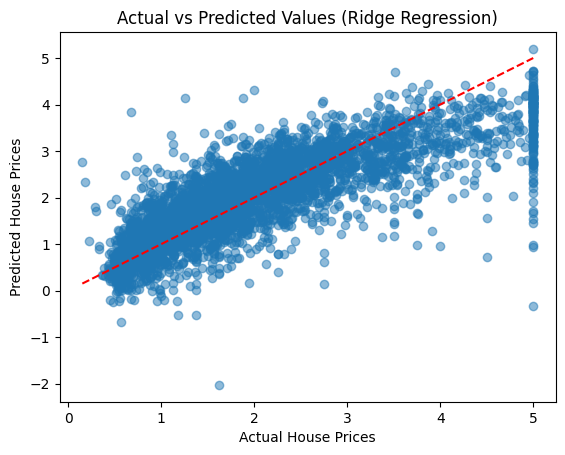

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted Values (Ridge Regression)")
plt.show()


### **Ridge Regression reduces overfitting by shrinking coefficients, but in this dataset it does not outperform Polynomial Regression because the relationship is mildly non-linear.**